<a href="https://colab.research.google.com/github/zhesun0304/ECON3916/blob/main/Lab3/Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Visualizing Development with WBGAPI
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

country_codes = ['GTM','UMC','WLD','BRA']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}


In [ ]:
# Fetching data
raw_data = wb.data.DataFrame(indicators, economy= country_codes, time= range(2000,2025))

# transposing data
df = raw_data.transpose()

df.head(10)

economy            BRA                                                  \
series  FP.CPI.TOTL.ZG GC.TAX.TOTL.GD.ZS NE.CON.GOVT.ZS NE.EXP.GNFS.ZS   
YR2000        7.044141               NaN      18.767846      10.188048   
YR2001        6.840359               NaN      19.343295      12.371711   
YR2002        8.450164               NaN      19.809662      14.230590   
YR2003       14.714920               NaN      19.077478      15.180784   
YR2004        6.597185               NaN      18.467584      16.545762   
YR2005        6.869537               NaN      18.890001      15.243829   
YR2006        4.183568               NaN      19.038917      14.374316   
YR2007        3.641273               NaN      18.942988      13.327675   
YR2008        5.678594               NaN      18.839393      13.534001   
YR2009        4.888035               NaN      19.650638      10.851371   

economy                                                              \
series  NE.GDI.TOTL.ZS NE.IMP.GNFS.ZS NY.GDP.MKTP.KD NY.GDP.PCAP.KD   
YR2000       18.903119      12.451713   1.186419e+12    6817.783456   
YR2001       18.741860      14.564574   1.202909e+12    6823.033185   
YR2002       17.449079      13.387767   1.239639e+12    6944.622576   
YR2003       16.856688      12.959601   1.253781e+12    6941.439659   
YR2004       17.912568      13.132491   1.325999e+12    7258.781017   
YR2005       17.204883      11.842966   1.368459e+12    7409.568280   
YR2006       17.816474      11.667384   1.422677e+12    7622.039194   
YR2007       19.819326      11.964936   1.509032e+12    8003.253210   
YR2008       21.619383      13.723569   1.585905e+12    8330.763640   
YR2009       18.796135      11.254604   1.583910e+12    8246.096121   

economy                                ...            WLD                 \
series  NY.GDS.TOTL.ZS SL.TLF.CACT.ZS  ... NE.CON.GOVT.ZS NE.EXP.GNFS.ZS   
YR2000       16.639454         65.807  ...      15.999621      23.465314   
YR2001       16.548997         66.034  ...      16.382130      22.870610   
YR2002       18.291903         66.975  ...      16.782459      23.116728   
YR2003       19.077871         66.898  ...      17.036216      23.862095   
YR2004       21.325839         67.364  ...      16.884092      25.722670   
YR2005       20.605747         68.050  ...      16.741759      26.995684   
YR2006       20.523407         67.705  ...      16.590818      28.641214   
YR2007       21.182065         67.295  ...      16.521540      29.569383   
YR2008       21.429814         67.173  ...      16.894373      30.731826   
YR2009       18.392902         67.401  ...      18.031682      26.166401   

economy                                                              \
series  NE.GDI.TOTL.ZS NE.IMP.GNFS.ZS NY.GDP.MKTP.KD NY.GDP.PCAP.KD   
YR2000       24.462487      23.412644   4.842569e+13    7858.907966   
YR2001       23.695335      22.913313   4.941287e+13    7912.245893   
YR2002       23.026378      22.930455   5.055484e+13    7989.628892   
YR2003       23.203246      23.686598   5.211892e+13    8131.193084   
YR2004       23.912776      25.471904   5.446523e+13    8388.597338   
YR2005       24.312305      26.666070   5.667354e+13    8618.447405   
YR2006       24.892630      28.120119   5.921035e+13    8890.473329   
YR2007       25.381918      28.905748   6.182380e+13    9166.565071   
YR2008       25.385796      30.163759   6.311740e+13    9240.505627   
YR2009       23.362068      25.566217   6.228510e+13    9005.175924   

economy                                                              
series  NY.GDS.TOTL.ZS SL.TLF.CACT.ZS SL.TLF.TOTL.IN SL.UEM.TOTL.ZS  
YR2000       23.953361      64.435202   2.762444e+09       6.111266  
YR2001       23.070254      64.233095   2.806153e+09       6.189808  
YR2002       22.700953      64.054385   2.851212e+09       6.411809  
YR2003       22.795603      63.921617   2.898063e+09       6.483909  
YR2004       23.698974      63.838295   2.947529e+09       6.329692  
YR

In [ ]:
# Setting proper index

df.index.str.replace("YR","").astype(int)
df.index.name = 'Year'
df = df.sort_index()

# Renaming Columns
df.rename(columns=indicators, level=1, inplace=True)

# Extracting Guatemala for specific calculations
df_gtm = df.xs('BRA', axis=1, level=0).copy()

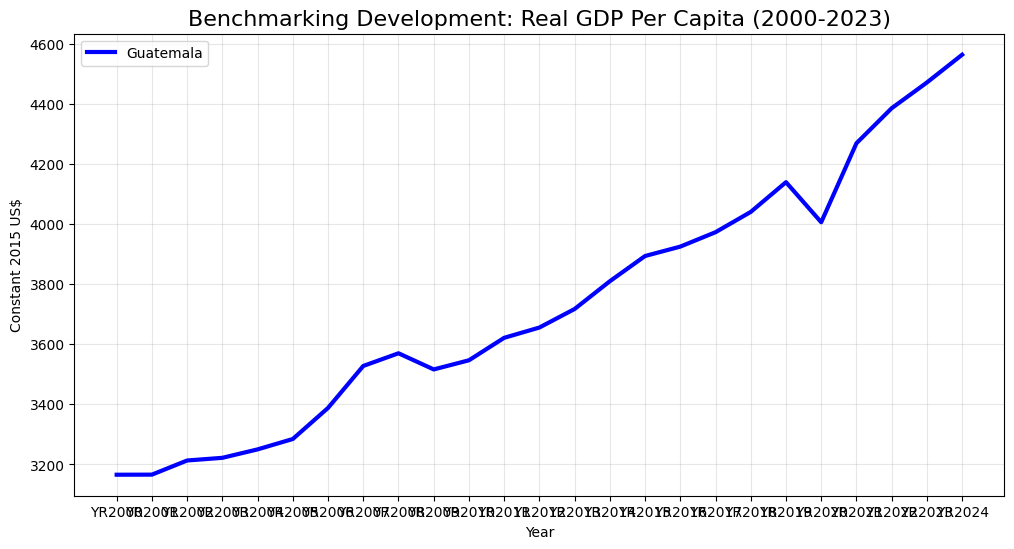

In [ ]:
# Plotting only Guatemala GDP per capita
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

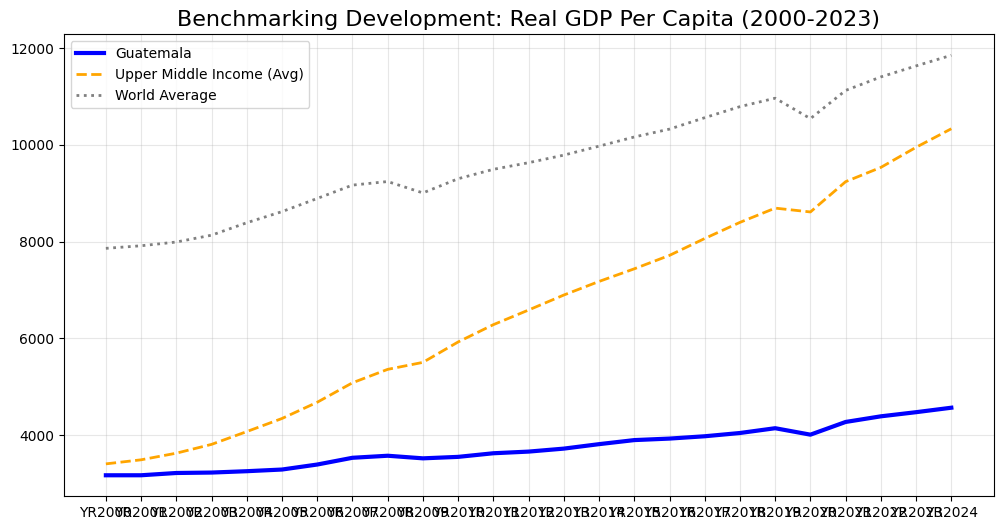

In [ ]:
# Upper Middle Income (UMC) and World (WLD) averages together with Guatemala GDP
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

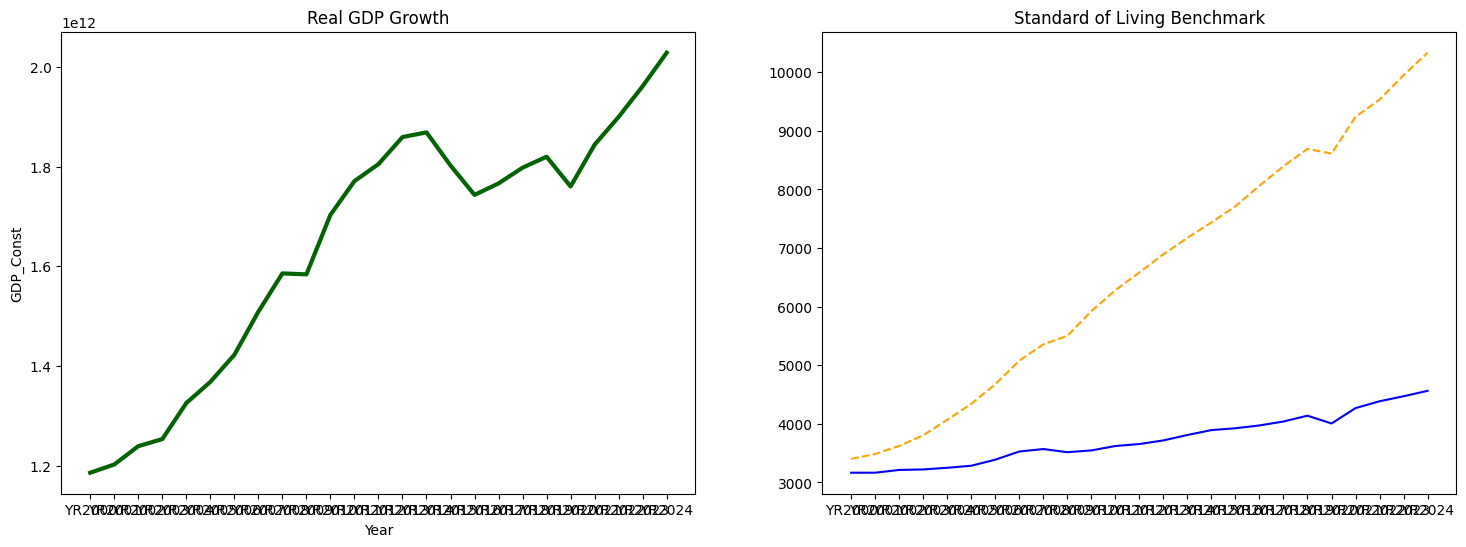

In [ ]:
# Side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

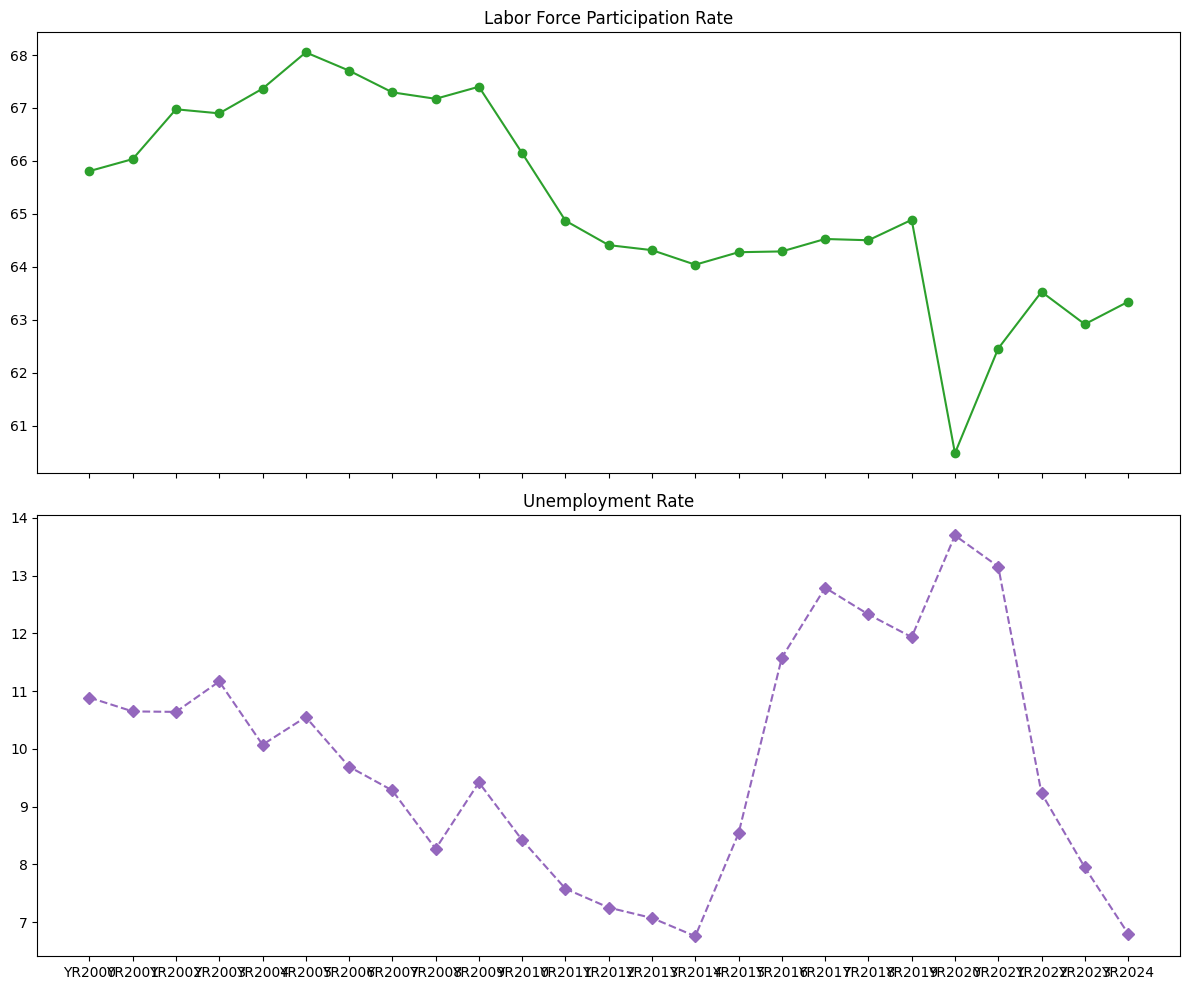

In [ ]:
# Vertical Comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

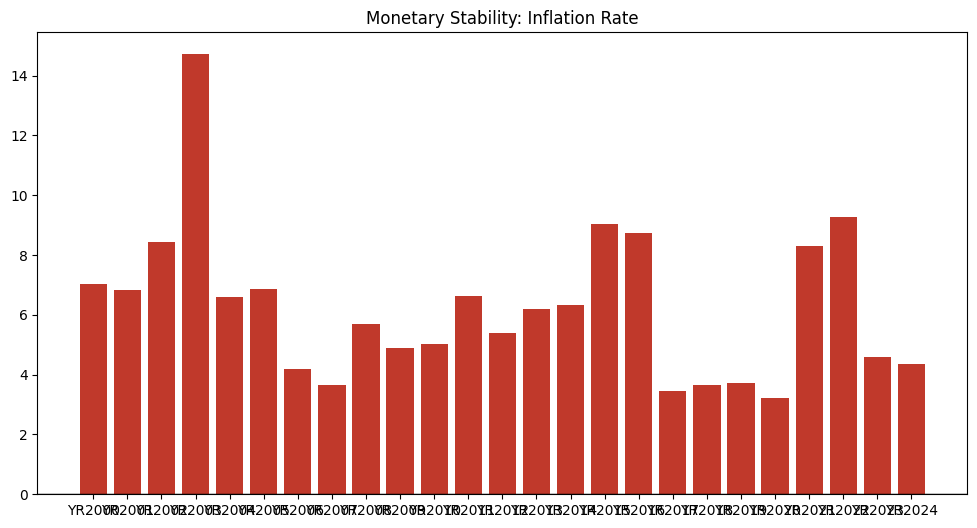

In [ ]:
# Annual Inflation
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

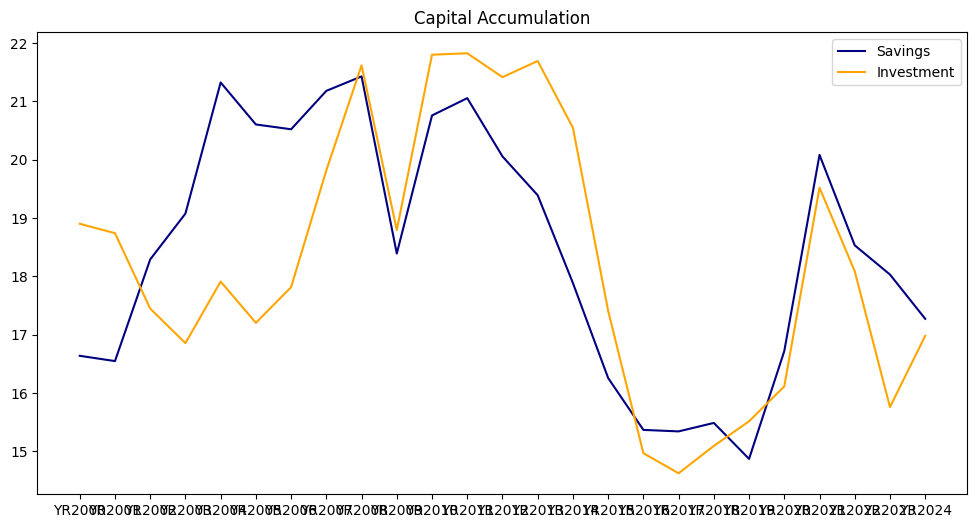

In [ ]:
# Savings & Investment
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

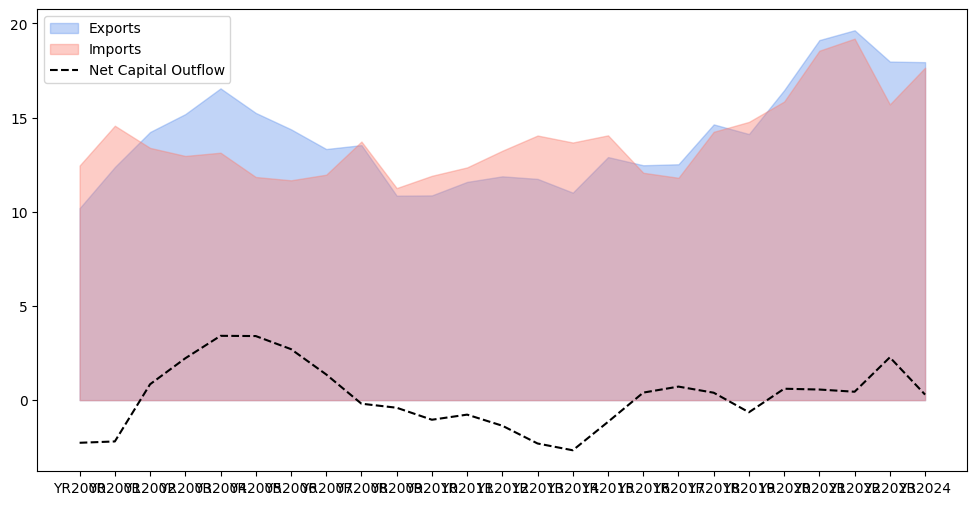

In [ ]:
# Trade Balance & NCO
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
# Calculate NCO as Exports_GDP - Imports_GDP
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

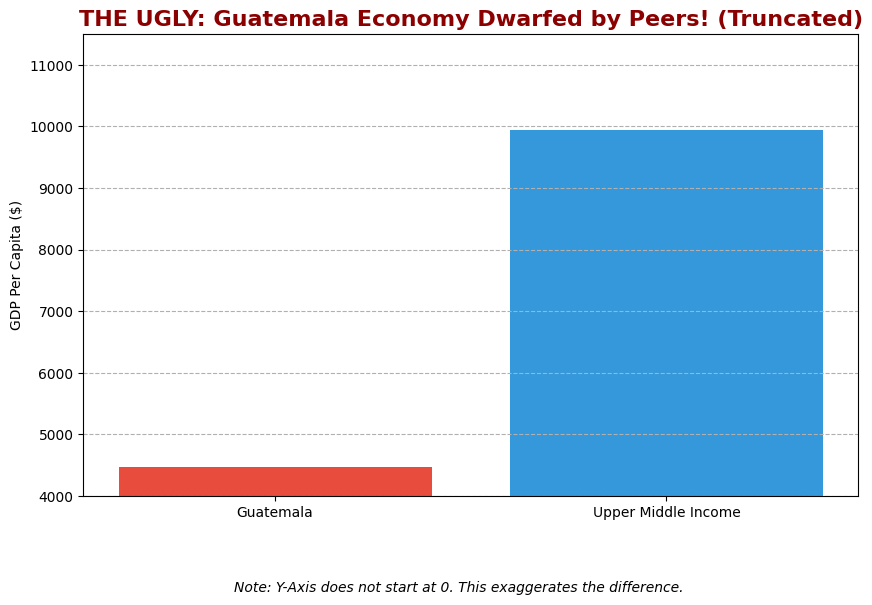

In [ ]:
## Phase3: Data Literacy
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 'YR2023'
gtm_val = df.loc[snapshot_year, ('GTM', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [gtm_val, umc_val]
labels = ['Guatemala', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Guatemala Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

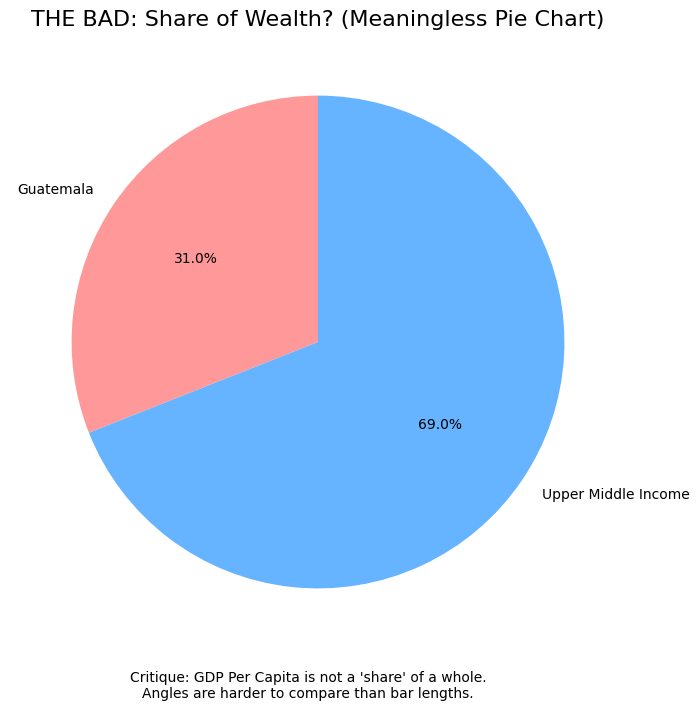

In [ ]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

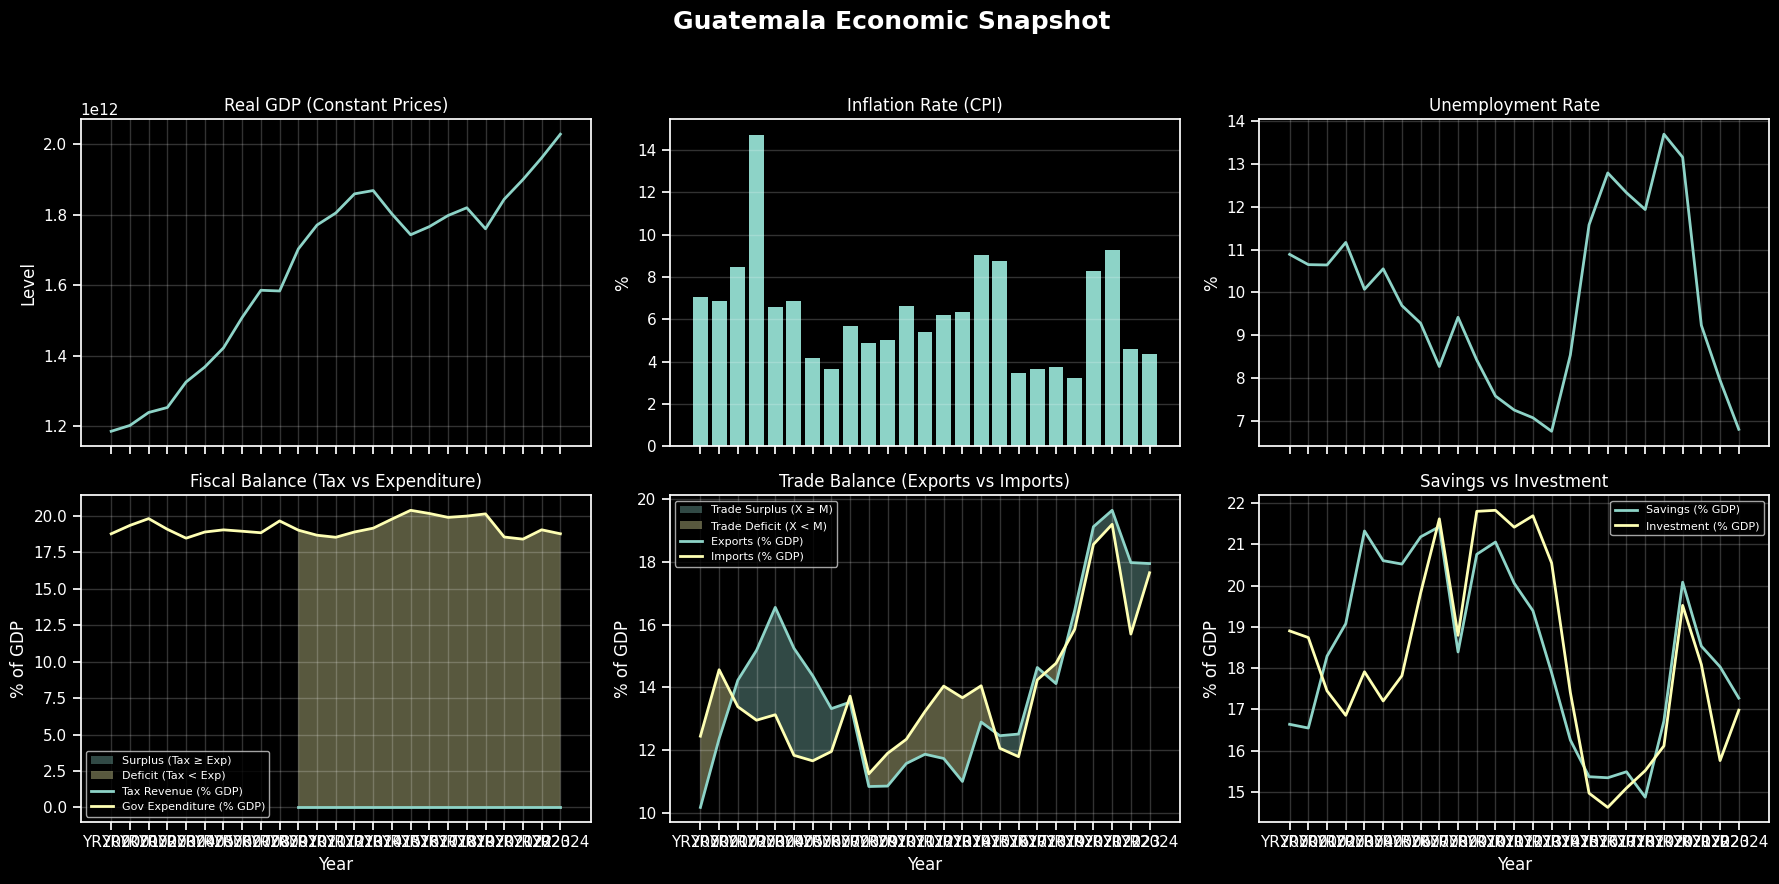

In [33]:
# Phase 4 AI Dashboard Expansion
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Assumes df_gtm has:
#   - index = Year (int) OR a 'Year' column
#   - columns exactly matching the variable names you listed
# --------------------------------------------------------

# If Year is a column (not index), uncomment:
# df_gtm = df_gtm.set_index('Year')

# Clean + sort just in case
df = df_gtm.copy()
df = df.sort_index()
df = df.apply(pd.to_numeric, errors="coerce")

plt.style.use("dark_background")
sns.set_context("notebook")  # optional; keeps fonts readable on dark bg

fig, axes = plt.subplots(2, 3, figsize=(18, 9), sharex=True)
fig.suptitle("Guatemala Economic Snapshot", fontsize=18, fontweight="bold", y=0.98)

x = df.index

# 1) Top Left: Real GDP (Line)
ax = axes[0, 0]
ax.plot(x, df["GDP_Const"], linewidth=2)
ax.set_title("Real GDP (Constant Prices)")
ax.set_ylabel("Level")
ax.grid(True, alpha=0.2)

# 2) Top Middle: Inflation (Bar) + 0 line
ax = axes[0, 1]
ax.bar(x, df["Inflation_CPI"])
ax.axhline(0, linewidth=1)
ax.set_title("Inflation Rate (CPI)")
ax.set_ylabel("%")
ax.grid(True, axis="y", alpha=0.2)

# 3) Top Right: Unemployment (Line)
ax = axes[0, 2]
ax.plot(x, df["Unemployment_Rate"], linewidth=2)
ax.set_title("Unemployment Rate")
ax.set_ylabel("%")
ax.grid(True, alpha=0.2)

# 4) Bottom Left: Fiscal Balance (Tax vs Gov Exp) fill between
ax = axes[1, 0]
tax = df["Tax_Rev_GDP"]
gexp = df["Gov_Exp_GDP"]
ax.fill_between(x, tax, gexp, where=(tax >= gexp), alpha=0.35, interpolate=True, label="Surplus (Tax ≥ Exp)")
ax.fill_between(x, tax, gexp, where=(tax < gexp),  alpha=0.35, interpolate=True, label="Deficit (Tax < Exp)")
ax.plot(x, tax, linewidth=2, label="Tax Revenue (% GDP)")
ax.plot(x, gexp, linewidth=2, label="Gov Expenditure (% GDP)")
ax.set_title("Fiscal Balance (Tax vs Expenditure)")
ax.set_ylabel("% of GDP")
ax.grid(True, alpha=0.2)
ax.legend(fontsize=8, loc="best")

# 5) Bottom Middle: Trade Balance (Exports vs Imports) fill between
ax = axes[1, 1]
ex = df["Exports_GDP"]
im = df["Imports_GDP"]
ax.fill_between(x, ex, im, where=(ex >= im), alpha=0.35, interpolate=True, label="Trade Surplus (X ≥ M)")
ax.fill_between(x, ex, im, where=(ex < im),  alpha=0.35, interpolate=True, label="Trade Deficit (X < M)")
ax.plot(x, ex, linewidth=2, label="Exports (% GDP)")
ax.plot(x, im, linewidth=2, label="Imports (% GDP)")
ax.set_title("Trade Balance (Exports vs Imports)")
ax.set_ylabel("% of GDP")
ax.grid(True, alpha=0.2)
ax.legend(fontsize=8, loc="best")

# 6) Bottom Right: Savings vs Investment (Dual lines)
ax = axes[1, 2]
ax.plot(x, df["Gross_Dom_Savings"], linewidth=2, label="Savings (% GDP)")
ax.plot(x, df["Gross_Cap_Formation"], linewidth=2, label="Investment (% GDP)")
ax.set_title("Savings vs Investment")
ax.set_ylabel("% of GDP")
ax.grid(True, alpha=0.2)
ax.legend(fontsize=8, loc="best")

# X-axis formatting
for ax in axes[1, :]:
    ax.set_xlabel("Year")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()